# Time-independent simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sys
sys.path.append('/Users/riverr/Documents/pyfel1d/main/')
from particles import ParticleLoader
from fel import OneDFELSolver
import time

This notebook illustrates the workflow for a time-independent simulation in pyfel1d. 

# Simulation set up 

In [2]:
solver = OneDFELSolver(Lzhat=15, ## undulator length
                       Nzhat=1500, ## number of steps in undulator
                       time_independent=True) 

In [3]:
# specify seed field value 
solver.a0 = 1e-3

In [4]:
# specify initial particle coordinates, we'll use the ParticleLoader class to do this with correct shot noise 

solver.generate_beam(bdes=1e-4)

# Run simulation and look at results

In [5]:
%%time
solver.run_simulation(steps_between_store = 10, ## store the field every 10 steps 
                      verbose=True, ## print status in 10% intervals 
                      store_particles=True) ## specify that we want to store the particle distribution as well

Beam profile $\chi$ is unspecified, setting it to 1 for all zeta
Found no input harmonics array, assuming only first harmonic present
Found no input taper array, assuming it is zero everywhere
Beginning simulation including harmonics: [1]
0% done
10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done
90% done
Done
CPU times: user 771 ms, sys: 3.67 s, total: 4.44 s
Wall time: 730 ms


In [6]:
mus = np.array([-1, (1+1j*np.sqrt(3))/2, (1-1j*np.sqrt(3))/2])
b0 = solver.calculate_moments(1, 0)
p0 = solver.calculate_moments(1, 1)
a0 = solver.a0

linear_soln = np.sum((a0*mus+1j*b0-1j*p0/mus)*np.exp(-1j*mus*solver.zhat_store[:,None])/(3*mus), axis=-1)

Text(0, 0.5, 'Average power $|a|^2$')

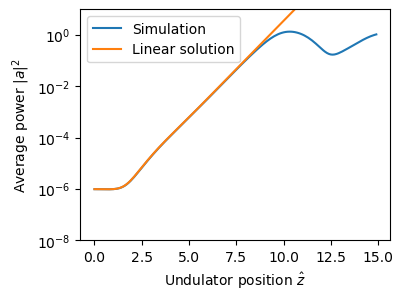

In [7]:
plt.figure(figsize=(4,3))
plt.plot(solver.zhat_store, np.abs(solver.a_store)**2, label=f'Simulation')
plt.plot(solver.zhat_store, np.abs(linear_soln)**2, label='Linear solution')
plt.ylim(1e-8, 10)
plt.yscale('log')
plt.legend()
plt.xlabel(r'Undulator position $\hat{z}$')
plt.ylabel(r'Average power $|a|^2$')

Text(0, 0.5, 'Energy offset $\\eta$')

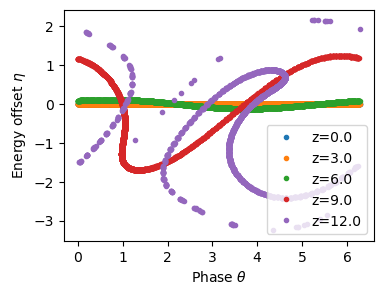

In [8]:
plt.figure(figsize=(4,3))
i_plots = np.linspace(0, len(solver.zhat_store), 5, endpoint=False).astype(int)
for i in i_plots:
    plt.plot(solver.theta_store[i]%(2*np.pi), solver.eta_store[i], '.', label=f'z={solver.zhat_store[i]:.1f}')
plt.legend()
plt.xlabel(r'Phase $\theta$')
plt.ylabel(r'Energy offset $\eta$')